In [1]:
import numpy as np
np.random.seed(1111)

import matplotlib.pyplot as plt
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from pyHalo.preset_models import CDM
import matplotlib.pyplot as plt
from quadmodel.quad_model import QuadLensSystem
from quadmodel.macromodel import MacroLensModel
from quadmodel.deflector_models.preset_macromodels import EPLShear

[0.54917706 0.88671991 1.         0.19127916]


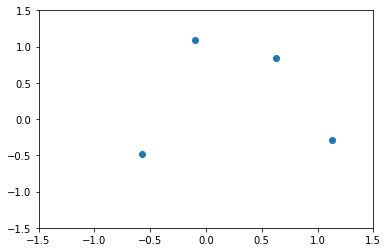

In [2]:
lens_model_list_macro = ['EPL','SHEAR']
kwargs_macro = [{'theta_E': 1.0, 'center_x': 0.0, 'center_y': 0.0, 'e1': 0.05, 'e2': 0.1,'gamma':2.0},
                {'gamma1': 0.03,'gamma2':-0.07}]
zlens, z_source = 0.5, 2.0
lm_macro = LensModel(lens_model_list_macro)
source_x, source_y = 0.13, 0.1
solver = LensEquationSolver(lm_macro)
x_image, y_image = solver.image_position_from_source(source_x, source_y, kwargs_macro)  
mag = np.absolute(lm_macro.magnification(x_image, y_image, kwargs_macro))
mag = np.absolute(mag)/np.max(mag)
print(mag)
plt.scatter(x_image, y_image)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

class Data(object):
    x = x_image
    y = y_image
data = Data()

In [3]:
gamma_macro = 2.0
gamma_macro = kwargs_macro[0]['gamma']
shear_amp = np.sqrt(kwargs_macro[1]['gamma1']**2 + kwargs_macro[1]['gamma2']**2)
model = EPLShear(zlens, gamma_macro, shear_amp)
macromodel = MacroLensModel(model.component_list)
quad = QuadLensSystem(macromodel, z_source)
quad.initialize(data)
lm_fit, kw_fit = quad.get_lensmodel()

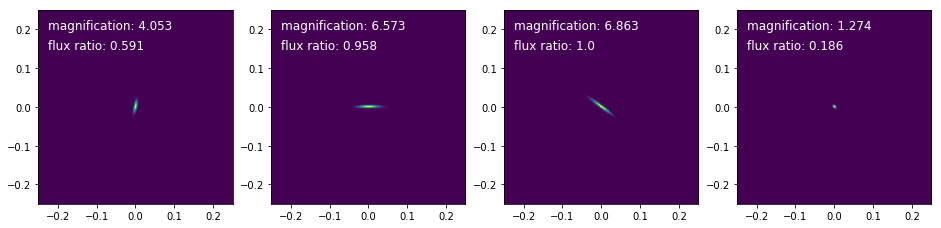

In [4]:
quad.plot_images(x_image, y_image, 50.0, lm_fit, kw_fit)

In [5]:
cdm = CDM(0.5, 2.0, sigma_sub=0.06, LOS_normalization=1.0, log_m_host=13.3, log_mlow=6.0)
lens_model_list_halos, redshift_list_halos, kw_halos, _ = cdm.lensing_quantities()
kw_full = kwargs_macro + kw_halos
lm = LensModel(lens_model_list_macro + lens_model_list_halos, lens_redshift_list=[0.5]*2 + list(redshift_list_halos),
              multi_plane=True, z_source=z_source)
leq = LensEquationSolver(lm)
x_image_sub, y_image_sub = leq.image_position_from_source(source_x, source_y, kw_full)

array([ 1.11479788, -0.08983757,  0.55698859, -0.56995511])
array([-0.29678043,  1.06137241,  0.86675635, -0.47237552])
[4.34745912 7.07745293 9.01834417 1.69859453]
[0.48206844 0.78478408 1.         0.18834882]


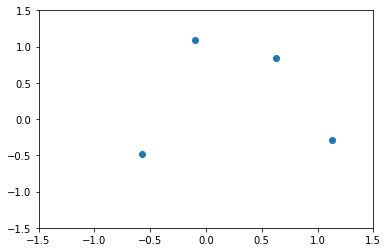

In [8]:
plt.scatter(x_image, y_image)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

source_size = 40.

from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
ext = LensModelExtensions(lm)
mag = ext.magnification_finite_adaptive(x_image_sub, y_image_sub, source_x, source_y, 
                                        kw_full, source_size, z_source)
print(repr(x_image_sub))
print(repr(y_image_sub))
print(mag) 
print(mag/max(mag))

In [9]:
print(np.hypot(0.03, 0.07))

0.07615773105863909


In [10]:
print(kw_full[0])

{'theta_E': 1.0, 'center_x': 0.0, 'center_y': 0.0, 'e1': 0.05, 'e2': 0.1, 'gamma': 2.0}


In [12]:
m=np.array([0.48206844, 0.78478408, 1.,         0.18834882])
m/m[0]

array([1.        , 1.62795158, 2.07439425, 0.39070971])